# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


## 1. Carga de datos

In [1]:
# Cargamos las librerias que necesitaremos para nuestro análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
# Cargamos los archivos correspondientes
path = '/datasets/final_provider/'

contract_df = pd.read_csv(path + 'contract.csv')
personal_df = pd.read_csv(path + 'personal.csv')
internet_df = pd.read_csv(path + 'internet.csv')
phone_df = pd.read_csv(path + 'phone.csv')

### 1.1 Visualización de los DataFrames

In [3]:
# Mostramos formas y primeras filas
print("contract_df:", contract_df.shape)
display(contract_df.head())

print("personal_df:", personal_df.shape)
display(personal_df.head())

print("internet_df:", internet_df.shape)
display(internet_df.head())

print("phone_df:", phone_df.shape)
display(phone_df.head())

contract_df: (7043, 8)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


personal_df: (7043, 5)


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


internet_df: (5517, 8)


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


phone_df: (6361, 2)


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


En los Dataset la columna customerID está presente en todos los archivos y será la clave para unir los archivos.

Por otro lado EndDate contiene tanto fechas como la cadena 'No', que será nuestra variable objetivo (churn).

En la columna SeniorCitizen parece codificada como 0 y 1, lo cual probablemente representa "No" y "Sí" respectivamente.

Tomando en cuenta otras consideraciones, los valores de servicios (Yes / No) están en formato de texto, lo cual requerirá transformación para el modelado. Ademas algunos clientes tienen solo contrato, sin servicios de Internet ni telefonía.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente comienzo. La carga de datos está bien organizada, las bibliotecas relevantes están correctamente importadas y has mostrado una comprensión inicial sólida al identificar claves de unión, la variable objetivo y aspectos a transformar. Buena base para avanzar con el análisis.  
</div>


## 2. Variable objetivo (churn) 

In [4]:
# Creamos la variable 'churn': 1 = canceló, 0 = no canceló
contract_df['churn'] = contract_df['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

In [5]:
# Conteo definitivo y en proporción de cancelaciones
churn_counts = contract_df['churn'].value_counts().rename_axis('churn').reset_index(name='cantidad')
churn_counts['proporcion'] = churn_counts['cantidad'] / churn_counts['cantidad'].sum()

display(churn_counts)


,churn,cantidad,proporcion
0,0,5174,0.73463
1,1,1869,0.26537


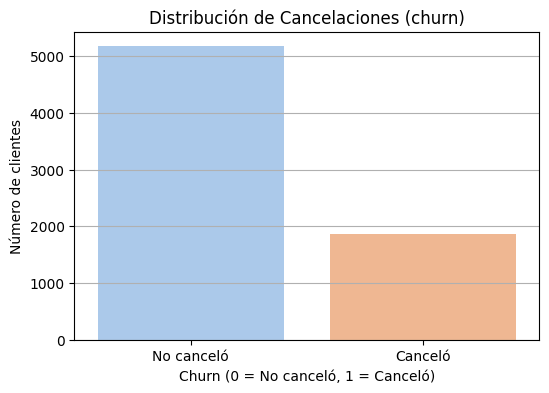

In [6]:
# Graficamos los resultados

plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=contract_df, palette='pastel')
plt.title('Distribución de Cancelaciones (churn)')
plt.xlabel('Churn (0 = No canceló, 1 = Canceló)')
plt.ylabel('Número de clientes')
plt.xticks([0, 1], ['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.show()

Segun los resultados obtenidos el conjunto está desbalanceado, lo que implica que alrededor del 26.5% de los clientes cancelaron su contrato. Esto nos indica que al entrenar modelos de clasificación, una predicción ingenua podría simplemente adivinar que todos permanecen y aun así obtener una alta exactitud.

Por ello, es crítico usar métricas más robustas como AUC-ROC y posiblemente F1-score.

Para ocuparnos del desbalance podemos emplear alguna de las siguientes técnicas que mejor se adecue para entrenar el modelo: 

* class_weight='balanced' en modelos.

* SMOTE (oversampling).

* Undersampling de la clase mayoritaria.

* O ajuste de umbrales de probabilidad.

### 2.2 Unificación del Dataset

La unión de los cuatro archivos (contract.csv, personal.csv, internet.csv y phone.csv) es fundamental para construir un dataset completo que concentre toda la información disponible sobre cada cliente. Esta integración nos permite consolidar datos dispersos ya que cada archivo archivo contiene información parcial.

Solo al combinarlos podemos analizar el perfil completo del cliente y su relación con la cancelación.
Como práctica se utilizó merge(..., how='left') sobre contract_df (con todos los clientes), lo que garantiza no perder registros aunque falte información de Internet o telefonía.

In [7]:
# Unimos contract con personal
df_full = contract_df.merge(personal_df, on='customerID', how='left')

# Unimos con internet
df_full = df_full.merge(internet_df, on='customerID', how='left')

# Unimos con phone
df_full = df_full.merge(phone_df, on='customerID', how='left')

# Forma final del DataSet combinado
print("Dimensiones del DataFrame final:", df_full.shape)
display(df_full.head())

Dimensiones del DataFrame final: (7043, 21)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [8]:
# Valores nulos por columna
df_full.isnull().sum().sort_values(ascending=False)

StreamingMovies     1526
StreamingTV         1526
TechSupport         1526
DeviceProtection    1526
OnlineBackup        1526
OnlineSecurity      1526
InternetService     1526
MultipleLines        682
Partner                0
Dependents             0
customerID             0
BeginDate              0
gender                 0
churn                  0
TotalCharges           0
MonthlyCharges         0
PaymentMethod          0
PaperlessBilling       0
Type                   0
EndDate                0
SeniorCitizen          0
dtype: int64

Los valores nulos en su mayoria provienen del archivo internet.csv. Hay exactamente 1,526 clientes sin datos de servicios de internet, lo que indica que no contrataron ningún servicio de Internet.

El valor NaN en estas columnas no es un error de datos, sino una ausencia lógica, si no tienen servicio de Internet, no pueden tener servicios asociados.

La falta de datos se debe a que 682 clientes no tienen servicio telefónico, por lo que no se puede hablar de líneas múltiples.

### 2.3 Tratamiento de valores nulos

Los valores nulos no representan errores, sino ausencia real de servicios.

Se deben tratar de manera explícita antes del entrenamiento para evitar:

* Eliminación innecesaria de filas.

* Falsas interpretaciones por parte de algoritmos.

In [9]:
internet_columns = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in internet_columns: #Imputamos los valores nulos del DataFrame con la leyenda "No internet" ya que esto hace referencia a clientes potenciales para el servicio
    df_full[col] = df_full[col].fillna('No internet')


In [10]:
df_full['MultipleLines'] = df_full['MultipleLines'].fillna('No phone service') # Ahora imputamos la columna de "Multiplelines" con "No phone service" para identificar estos valores nulos

In [11]:
# Confirmar que no queden valores nulos
print("Valores nulos restantes por columna:")
display(df_full.isnull().sum().sort_values(ascending=False))

Valores nulos restantes por columna:


customerID          0
Partner             0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
Dependents          0
SeniorCitizen       0
BeginDate           0
gender              0
churn               0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Type                0
EndDate             0
MultipleLines       0
dtype: int64

### 2.4 Tratamiento de otros datos para el análisis

In [12]:
print(df_full.dtypes)

customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
churn                 int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
MultipleLines        object
dtype: object


En la columna TotalCharges fue interpretada como objeto (object) en lugar de numérica, por lo que no se puede aplicar > 0 directamente para el analisis del EDA.

Esto ocurre comúnmente cuando hay valores vacíos o mal formateados (por ejemplo, espacios en blanco) en columnas que deberían ser numéricas. Para ello, trataremos esta columna convirtiendola a valores numéricos.

In [13]:
# Convertir TotalCharges a numérico, convirtiendo errores a NaN
df_full['TotalCharges'] = pd.to_numeric(df_full['TotalCharges'], errors='coerce')

# Confirmar conversión y cantidad de NaN resultantes
print("Valores NaN en TotalCharges después de la conversión:", df_full['TotalCharges'].isna().sum())


Valores NaN en TotalCharges después de la conversión: 11


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien desarrollada esta etapa. Identificaste correctamente la variable objetivo, uniste las fuentes de datos de forma lógica y trataste los valores nulos de manera consciente y fundamentada. La preparación del dataset está bien encaminada para el modelado. Buen manejo conceptual.  
</div>


## 3. Analisis exploratorio de datos

### 3.1 EDA por variables en el contrato

Variables a analizar:

1. Type (Tipo de contrato)

2. PaperlessBilling (Facturación electrónica)

3. PaymentMethod (Método de pago)

4. MonthlyCharges (Cargos mensuales)

5. TotalCharges (Cargos totales)

#### 3.1.1 Tipo de contrato (Type) vs. Churn

Este análisis se realiza porque el tipo de contrato puede influir directamente en la decisión de un cliente de cancelar el servicio. Por lo tanto sabemos que un contrato más largo implica un mayor compromiso; los contratos mensuales dan más libertad para abandonar el servicio en cualquier momento.

Por tanto, es importante conocer si existe una relación entre el tipo de contrato y la tasa de cancelación.

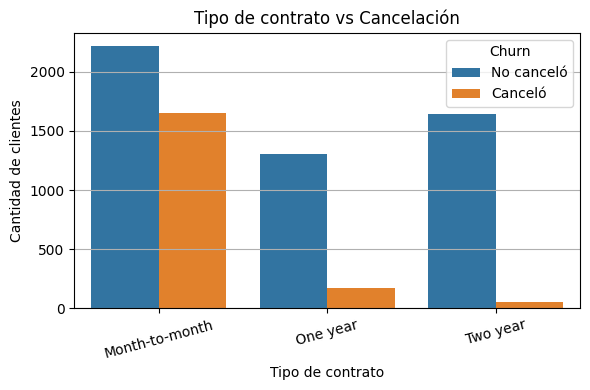

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_full, x='Type', hue='churn', palette={0: '#1f77b4', 1: '#ff7f0e'})
plt.title('Tipo de contrato vs Cancelación')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

* En el analisis mensual o Month-to-month, resulto que tiene el mayor número de cancelaciones. También es el tipo más común entre quienes no cancelan, pero la proporción de cancelación es alta.

* Para la relación de un año a dos (one year - Two year), obtuvimos que se tiene una tasa de cancelación mucho menor; especialmente el contrato de 2 años, donde la cancelación es casi nula en comparación.

El contrato de tipo "Month-to-month" es un fuerte indicador de riesgo de cancelación.

En cambio, los contratos de 1 o 2 años parecen "proteger" contra la cancelación, probablemente por beneficios o penalizaciones por terminar anticipadamente.

#### 3.1.2 Facturación electrónica (PaperlessBilling) vs. Churn

La variable PaperlessBilling indica si el cliente recibe facturas electrónicas. Aunque parece una característica administrativa, puede estar correlacionada con el perfil tecnológico del cliente, su experiencia con el servicio o su tipo de contrato o método de pago.

Analizar esta variable nos ayuda a descubrir si este factor tiene relación con la retención o la pérdida de clientes.

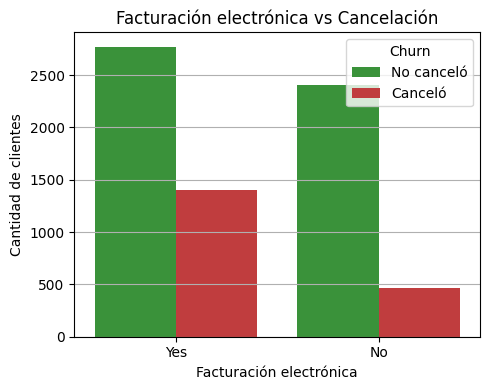

In [15]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df_full, x='PaperlessBilling', hue='churn', palette={0: '#2ca02c', 1: '#d62728'})
plt.title('Facturación electrónica vs Cancelación')
plt.xlabel('Facturación electrónica')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

* En la siguiente gráfica la muestra de 'Clientes con facturación electrónica' (Yes), indica que se tiene una mayor cantidad total de clientes que solicitan este servicio, la cantidad de cancelaciones es visiblemente mas alta que en quienes no la usan, esto nos indica que hay una mayor tasa de cancelaciones relativas a los clientes que requieren de factura electronica.

* Por otro lado la muestra de 'Clientes sin facturación electrónica' (No), nos indica que presenta menos cancelaciones y que la tasa de retención es mas alta en comparación.

Por lo tanto la facturación electrónica está asociada a una mayor probabilidad de cancelación.

Estos datos nos indican que los clientes provablemente son más autónomos y propensos a cancelar por sí mismos el servicio, o quizá usan métodos de pago menos comprometidos como "electronic check".

#### 3.1.3 Método de pago (PaymentMethod) vs. Churn

El método de pago puede influir fuertemente en la decisión de un cliente de permanecer o cancelar, ya que está relacionado con la comodidad y automatización del pago. La probabilidad de que un cliente cause incumplimiento de pago o cancelación espontánea.

En general este indicador nos puede dar un panorama del perfil financiero o tecnológico del cliente.

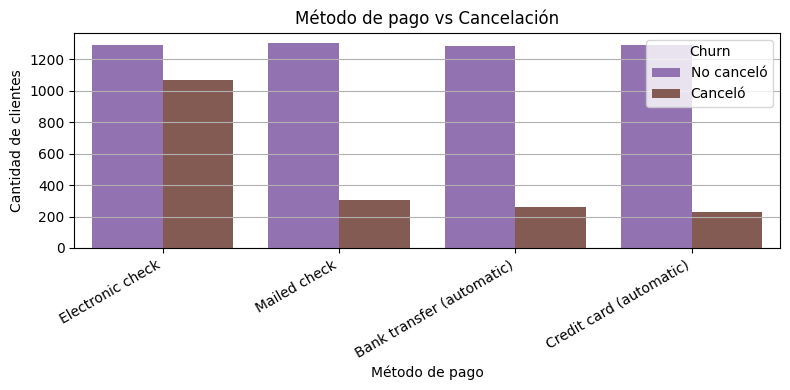

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_full, x='PaymentMethod', hue='churn', palette={0: '#9467bd', 1: '#8c564b'})
plt.title('Método de pago vs Cancelación')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Electronic check:**

* Tiene la tasa de cancelación más alta entre todos los métodos.

La diferencia entre cancelados y no cancelados es pequeña, lo que indica alta rotación.

**Mailed check:**

* Tiene menos cancelaciones relativas.

* Puede estar asociado a clientes tradicionales o con contratos más estables.

**Bank transfer (automatic) y Credit card (automatic):**

* Tienen las tasas de cancelación más bajas.

* La mayoría de sus usuarios no cancelan.

* Esto sugiere que los pagos automáticos se asocian con mayor retención.

Clientes que pagan con electronic check están en mayor riesgo de cancelar. Por el contrario, quienes usan pagos automáticos (banco o tarjeta) son más leales.

#### 3.1.4 Cargos mensuales (MonthlyCharges) vs. Churn (KDE)

Los cargos mensuales reflejan el nivel de servicios contratados por un cliente y, por lo tanto, pueden estar relacionados con la satisfacción del cliente respecto al valor recibido por lo que paga, el riesgo de cancelación si se considera que el precio no justifica los servicios o el tipo de contrato y método de pago, que suelen correlacionarse con tarifas.
Esto es importante ya que nos permite analizar si existe un patrón en la cancelación del servicio asociado con los 'paquetes' o montos que son cobrados cada mes.

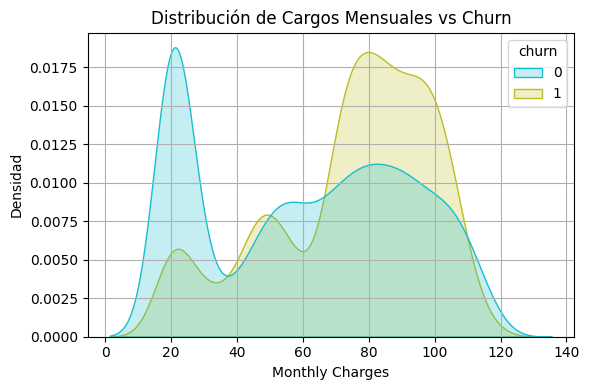

In [17]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_full, x='MonthlyCharges', hue='churn', fill=True,
            common_norm=False, palette={0: '#17becf', 1: '#bcbd22'})
plt.title('Distribución de Cargos Mensuales vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Densidad')
plt.grid(True)
plt.tight_layout()
plt.show()

**Clientes que no cancelaron (0):**

La gráfica nos muestra que tienen dos picos:

* Uno bajo (~ 20): probablemente clientes con servicios mínimos.

* Otro más amplio entre ~ 60 y 90: posiblemente con servicios completos bajo contratos estables.

Por lo tanto determinamos que la curva está más dispersa.

**Clientes que cancelaron (1):**

* Se concentran más entre 70 y 100, donde hay un pico marcado.

* Tienen menos presencia en cargos bajos, lo cual sugiere que clientes con cargos altos cancelan más.

Existe una relación positiva entre el monto del cargo mensual y la probabilidad de cancelación. Los cargos altos podrían generar insatisfacción, especialmente si el servicio no cumple con las expectativas.

#### 3.1.5 Cargos totales (TotalCharges) vs. Churn (KDE)

Los cargos totales representan el valor monetario acumulado de cada cliente a lo largo del tiempo. Puede reflejar la antigüedad del cliente (quien ha estado más tiempo, ha pagado más).

Ayuda a evaluar si los clientes con menos inversión previa tienden a cancelar más fácilmente.

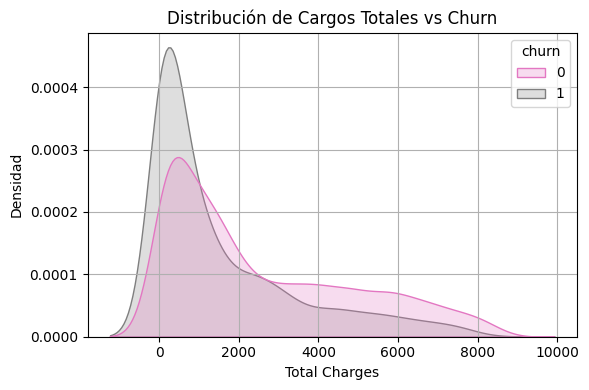

In [18]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_full[df_full['TotalCharges'] > 0], x='TotalCharges', hue='churn', fill=True,
            common_norm=False, palette={0: '#e377c2', 1: '#7f7f7f'})
plt.title('Distribución de Cargos Totales vs Churn')
plt.xlabel('Total Charges')
plt.ylabel('Densidad')
plt.grid(True)
plt.tight_layout()
plt.show()

**Clientes que no cancelaron (0):**

* Tienen una distribución más extendida y más carga acumulada, llegando a valores mucho mayores (incluso >8000).

* Presentan un pico claro alrededor de 500 – 1000, y su densidad se mantiene por más tiempo.

**Clientes que cancelaron (1):**

* Se concentran principalmente en los valores bajos, con una densidad que cae rápidamente después de los 1000.

* Esto sugiere que muchos de los que cancelan son clientes recientes o de baja inversión histórica.

Existe una correlación negativa entre TotalCharges y la probabilidad de cancelación, a menor carga total acumulada, mayor probabilidad de cancelación. Esto nos indica que los clientes nuevos son más propensos a cancelar si no están satisfechos pronto o que clientes antiguos son fieles al servicio.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente análisis exploratorio. Las visualizaciones están bien elegidas y acompañadas de interpretaciones claras y bien fundamentadas. Lograste identificar patrones relevantes entre variables contractuales y la cancelación. Tu enfoque analítico es sólido y orientado al entendimiento del comportamiento del cliente.  
</div>


### 3.2 EDA por perfil de cliente

Variables a analizar:

1. gender (Género)

2. SeniorCitizen (Adulto mayor)

3. Partner (Tiene pareja)

4. Dependents (Tiene dependientes)

#### 3.2.1 Género (gender) vs Churn

Analizaremos esta variable ya que el género puede revelar patrones de comportamiento distintos entre grupos demográficos. Aunque no siempre es un fuerte predictor por sí sola, puede ser útil en combinación con otras variables.

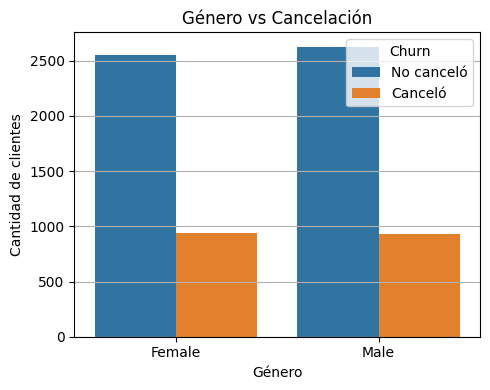

In [19]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df_full, x='gender', hue='churn', palette={0: '#1f77b4', 1: '#ff7f0e'})
plt.title('Género vs Cancelación')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

La cantidad de clientes está muy equilibrada entre hombres y mujeres. Las tasas de cancelación también son prácticamente idénticas para ambos géneros.

No hay evidencia visual de que el género tenga un impacto significativo en la decisión de cancelar. Tampoco existe una relación aparente entre el género y la cancelación del servicio.

#### 3.2.2 Adultos mayores (SeniorCitizen) vs Churn

La variable SeniorCitizen indica si el cliente tiene 65 años o más (1 = sí, 0 = no).

La edad puede influir en la fidelidad al servicio, el tipo de contrato elegido, y la relación costo-beneficio percibida. Puede reflejar distintos comportamientos de consumo y cancelación.

Es útil para segmentar campañas de retención específicas.

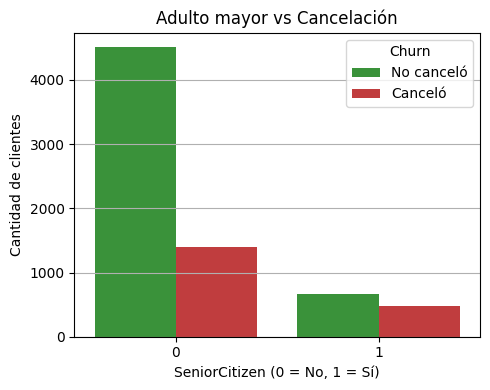

In [20]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df_full, x='SeniorCitizen', hue='churn', palette={0: '#2ca02c', 1: '#d62728'})
plt.title('Adulto mayor vs Cancelación')
plt.xlabel('SeniorCitizen (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

La mayoría de los clientes no son adultos mayores (SeniorCitizen = 0), y aunque muchos de ellos cancelan, la proporción de cancelación es más baja que entre adultos mayores.

* Entre los adultos mayores (SeniorCitizen = 1), hay una proporción más alta de cancelaciones en relación con su grupo total. Es decir, aunque son menos en número, su tasa de churn es relativamente mayor.

* Ser adulto mayor está asociado con un mayor riesgo de cancelación, aunque representan una menor proporción del total de clientes.

#### 3.2.3 Tiene pareja (Partner) vs Churn

La variable Partner indica si el cliente vive en pareja. La situación familiar puede estar relacionada con la estabilidad de los contratos, tipos de servicios contratados, o nivel de satisfacción general.

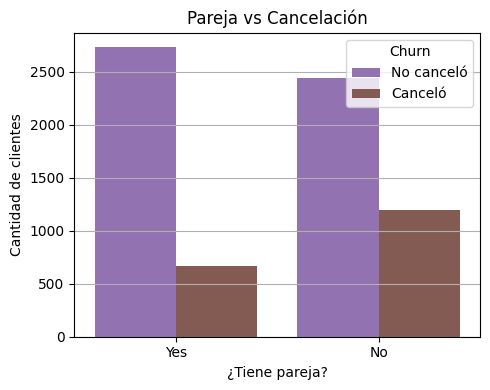

In [21]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df_full, x='Partner', hue='churn', palette={0: '#9467bd', 1: '#8c564b'})
plt.title('Pareja vs Cancelación')
plt.xlabel('¿Tiene pareja?')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Clientes con pareja (Yes):**

* Tienen menos cancelaciones en comparación con los que no tienen pareja.

* La diferencia entre clientes que cancelan y los que no es bastante marcada.

**Clientes sin pareja (No):**

* Presentan una mayor proporción de cancelación.

* Aunque su número total es ligeramente menor, tienen muchos más casos de cancelación.

No tener pareja está asociado con un mayor riesgo de cancelación del servicio. Esta información puede ser útil para la segmentación de campañas de fidelización.

#### 3.2.4 Tiene dependientes (Dependents) vs Churn

La variable Dependents indica si el cliente tiene personas a su cargo (hijos, familiares, etc.). Esta variable puede influir en las prioridades económicas y en la estabilidad del cliente.

Clientes con dependientes podrían ser más reacios a cambiar de proveedor, valorando más la estabilidad del servicio.

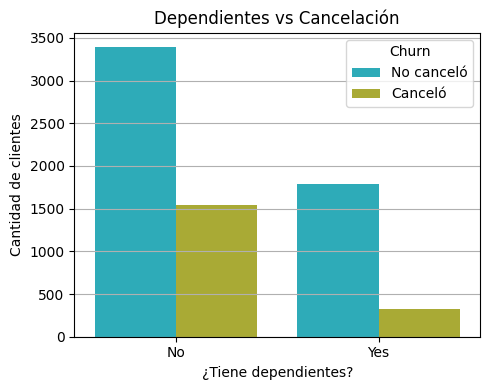

In [22]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df_full, x='Dependents', hue='churn', palette={0: '#17becf', 1: '#bcbd22'})
plt.title('Dependientes vs Cancelación')
plt.xlabel('¿Tiene dependientes?')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Clientes sin dependientes (No):**

* Representan una mayor proporción del total.

* Tienen una tasa de cancelación considerablemente más alta que quienes sí tienen dependientes.

**Clientes con dependientes (Yes):**

* Son menos numerosos.

* Muestran una tasa de cancelación significativamente menor.

No tener dependientes parece estar asociado con una mayor probabilidad de cancelar el servicio.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen enfoque en esta sección. Has analizado las variables demográficas con atención al detalle y destacaste correctamente los factores que no influyen significativamente, así como aquellos que sí muestran relación con la cancelación. Tu interpretación es clara y refleja un análisis reflexivo del comportamiento del cliente.  
</div>


### 3.3 EDA por servicios contratados

Variables a analizar:

1. InternetService (Servicios de Internet)

2. OnlineSecurity (Seguridad en línea)

3. OnlineBackup (Copias de seguridad)

4. DeviceProtection (Protección de dispositivos)

5. TechSupport (Soporte técnico)

6. StreamingTV (Servicio de entretenimiento en tv)

7. StreamingMovies (servicio de entretenimiento en peliculas)

#### 3.3.1 Tipo de servicio de Internet (InternetService) vs churn

El tipo de servicio de Internet contratado (DSL, Fiber optic o No internet) influye directamente en el nivel de uso del cliente, su percepción de calidad, el costo total del servicio, entre otras métricas.

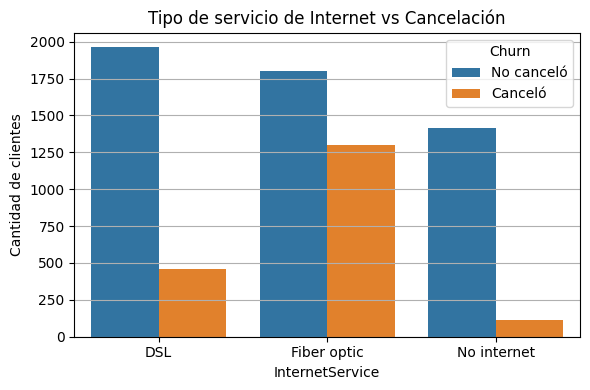

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_full, x='InternetService', hue='churn', palette={0: '#1f77b4', 1: '#ff7f0e'})
plt.title('Tipo de servicio de Internet vs Cancelación')
plt.xlabel('InternetService')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**DSL:**

* Tiene una cantidad importante de clientes y relativamente baja tasa de cancelación.

* Muchos clientes permanecen con este servicio.

**Fiber optic:**

* También es muy popular.

* Tiene una tasa de cancelación significativamente más alta que DSL.

* Esto podría deberse a expectativas no cumplidas, problemas técnicos, o mayor costo.

**No internet:**

* Son clientes con otros servicios (como telefonía).

* Su tasa de cancelación es la más baja, posiblemente por menores expectativas o uso limitado.

Los clientes con servicio de fibra óptica están en mayor riesgo de cancelar, comparado con los que usan DSL o no tienen internet.

La empresa Interconnect podría investigar causas técnicas o de satisfacción relacionadas con la fibra óptica para reducir cancelaciones.

#### 3.3.2 Seguridad en línea (OnlineSecurity) vs churn

La variable OnlineSecurity indica si el cliente tiene contratado un servicio de protección contra amenazas digitales (como antivirus o firewall). Esta métrica puede ser un servicio de valor agregado que influye en la percepción de calidad.

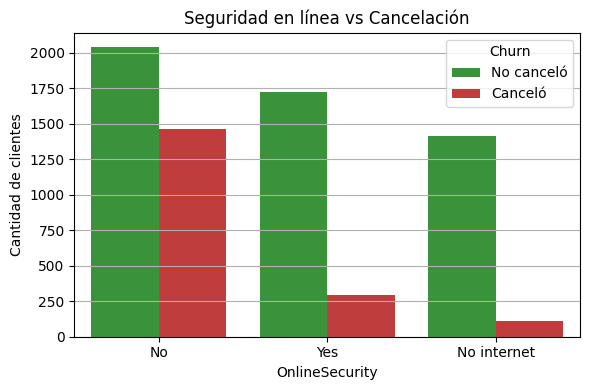

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_full, x='OnlineSecurity', hue='churn', palette={0: '#2ca02c', 1: '#d62728'})
plt.title('Seguridad en línea vs Cancelación')
plt.xlabel('OnlineSecurity')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Clientes sin OnlineSecurity:**

* Tienen una tasa de cancelación visiblemente alta.

* La diferencia entre los que se quedan y los que se van es menor, lo que indica mayor churn.

**Clientes con OnlineSecurity:**

* Tienen una menor tasa de cancelación.

* Hay una mayor proporción de clientes retenidos, lo cual sugiere que este servicio puede influir positivamente en la fidelidad.

**Clientes sin Internet (No internet):**

* Tienen, nuevamente, muy baja tasa de cancelación.

* La ausencia de seguridad en línea está asociada con una mayor probabilidad de cancelación.

Esto puede deberse a que los clientes con paquetes básicos menos satisfechos o por falta de interes o no conocen sobre los riesgos de la falta de seguridad digital.

#### 3.3.3 Copias de seguridad (OnlineBackup) vs churn

La variable OnlineBackup indica si el cliente contrató el servicio de respaldo de datos en la nube, una funcionalidad avanzada que puede estar relacionada con:

* Percepción de valor añadido al servicio.

* Tipo de cliente (más tecnológico o con necesidades específicas).

* Contratación de paquetes completos, lo cual puede favorecer la retención.

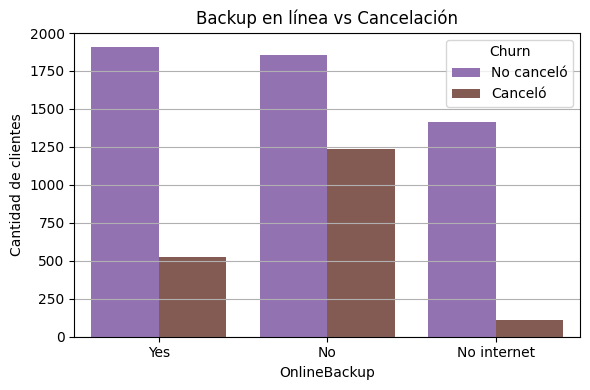

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_full, x='OnlineBackup', hue='churn', palette={0: '#9467bd', 1: '#8c564b'})
plt.title('Backup en línea vs Cancelación')
plt.xlabel('OnlineBackup')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Clientes con OnlineBackup (Yes):**

* Tienen una tasa de cancelación significativamente más baja.

* Hay un número claro de clientes que permanecen.*

**Clientes con OnlineBackup (No):**

* La tasa de cancelación es mucho mayor.

* La cantidad de clientes que se van casi iguala a la que permanece, lo que indica un mayor riesgo de churn.

**Clientes sin internet (No internet):**

* Nuevamente, tienen baja cancelación, lo que sigue el patrón visto en gráficas anteriores.

* La ausencia de respaldo en línea está claramente asociada con mayor churn.

Este servicio puede actuar como un factor de fidelización, especialmente si se ofrece como parte de paquetes.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente trabajo en esta sección. Tus análisis por tipo de servicio contratado están bien desarrollados y conectados con hipótesis relevantes sobre comportamiento del cliente. Las visualizaciones acompañan perfectamente la interpretación. Transmites con claridad cómo ciertos servicios pueden contribuir a la retención.  
</div>


#### 3.3.4 Protección de dispositivos (DeviceProtection) vs churn

La variable DeviceProtection indica si el cliente cuenta con software de protección o seguro de sus dispositivos como parte del servicio. Representa un servicio complementario que puede aumentar la percepción de valor.
Puede indicar un cliente que contrata paquetes más completos, lo que podría estar vinculado a menor propensión a cancelar.

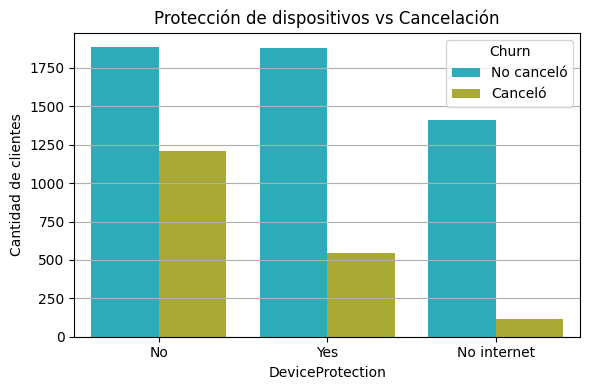

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_full, x='DeviceProtection', hue='churn', palette={0: '#17becf', 1: '#bcbd22'})
plt.title('Protección de dispositivos vs Cancelación')
plt.xlabel('DeviceProtection')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Clientes con DeviceProtection (Yes):**

* Tienen una tasa de cancelación notablemente menor.

* La diferencia entre quienes se quedan y quienes cancelan es amplia.

**Clientes con DeviceProtection (No):**

* Presentan una alta tasa de churn, similar a lo observado en OnlineBackup y OnlineSecurity.

**Clientes sin internet (No internet):** 

* Como en los casos anteriores, tienen una tasa de cancelación muy baja, aunque en este contexto, probablemente no están expuestos a los riesgos o beneficios del servicio.

* La falta de protección de dispositivos está asociada con una mayor probabilidad de cancelación.

#### 3.3.5 Soporte técnico (TechSupport) vs churn

El servicio de TechSupport representa el acceso a asistencia técnica especializada. Esta métrica puede influir directamente en la satisfacción del cliente ante problemas o dudas.
Clientes que no tienen soporte pueden sentirse abandonados ante fallas, lo que incrementa la probabilidad de cancelar.

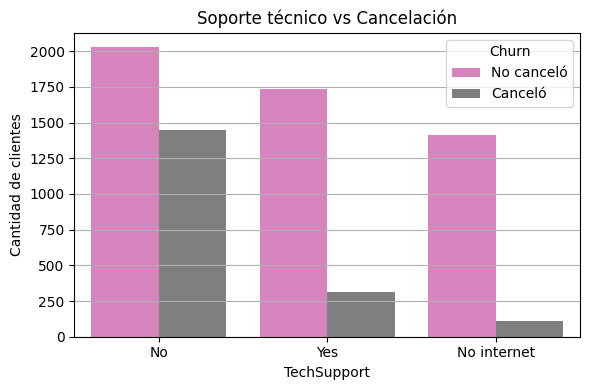

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_full, x='TechSupport', hue='churn', palette={0: '#e377c2', 1: '#7f7f7f'})
plt.title('Soporte técnico vs Cancelación')
plt.xlabel('TechSupport')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Clientes con soporte técnico (Yes):**

* Tienen una tasa de cancelación baja.

* Esto sugiere que contar con soporte ayuda a retener clientes, quizás por una mejor experiencia general.

**Clientes sin soporte técnico (No):**

* Tienen una tasa de cancelación muy alta, comparable a la proporción que permanece.

**Clientes sin Internet (No internet):**

* Como es habitual en este grupo, presentan baja cancelación.

* La falta de TechSupport es un importante factor de riesgo de churn.

#### 3.3.6 StreamingTV vs churn

El servicio de StreamingTV representa un complemento de entretenimiento que puede influir en la satisfacción general del cliente. Puede estar relacionado con el tipo de paquete contratado.

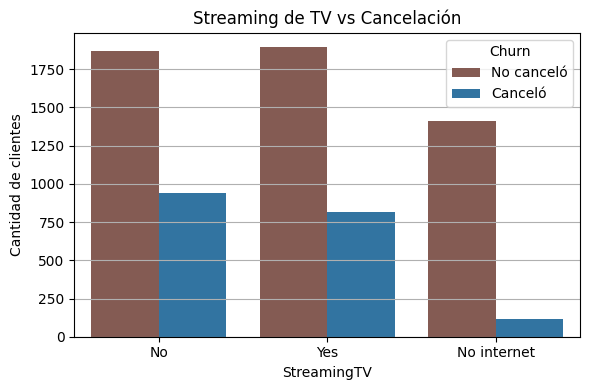

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_full, x='StreamingTV', hue='churn', palette={0: '#8c564b', 1: '#1f77b4'})
plt.title('Streaming de TV vs Cancelación')
plt.xlabel('StreamingTV')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Clientes con y sin StreamingTV (Yes y No):**

* Tienen cantidades casi idénticas de retención (no canceló).

* También presentan niveles similares de cancelación.

No hay una diferencia marcada que indique que contratar o no este servicio cambie significativamente la tasa de churn.

**Clientes sin internet (No internet):**

* Una vez más, presentan muy baja tasa de cancelación.

* A diferencia de otros servicios (como TechSupport o OnlineSecurity), StreamingTV no parece tener un impacto claro en la probabilidad de cancelación.

#### 3.3.7 StreamingMovies vs churn

El servicio de StreamingMovies representa un contenido adicional para entretenimiento. Puede reflejar el nivel de uso y satisfacción del cliente.

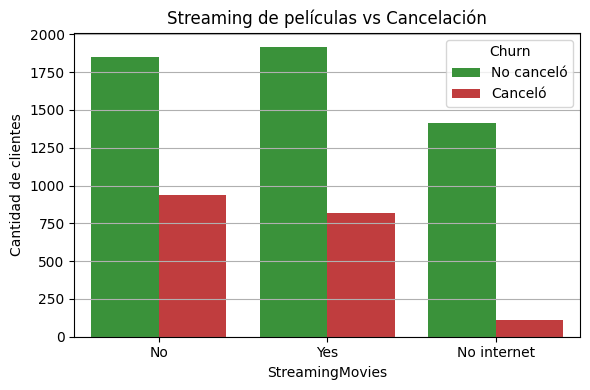

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_full, x='StreamingMovies', hue='churn', palette={0: '#2ca02c', 1: '#d62728'})
plt.title('Streaming de películas vs Cancelación')
plt.xlabel('StreamingMovies')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Clientes con y sin StreamingMovies (Yes y No):**

* Ambas categorías presentan una tasa de cancelación bastante similar.

* La diferencia entre los que cancelan y los que no no es tan marcada como en otros servicios.

**Clientes con sin internet (No internet):**

* Siguen mostrando una tasa de cancelación muy baja, como ha sido el patrón constante.

El servicio de películas por streaming no parece influir significativamente en la decisión de cancelar.

### 3.4 Conclusiones en la exploración de datos

| Categoría                        | Variable           | Relación con Churn | Hallazgo clave                                                           |
| -------------------------------- | ------------------ | ------------------ | ------------------------------------------------------------------------ |
| **Contrato y facturación**       | `Type`             | Alta               | Los contratos **mensuales** tienen la **mayor tasa de cancelación**.     |
|                                  | `PaperlessBilling` | Moderada           | Clientes con **facturación electrónica** cancelan más.                   |
|                                  | `PaymentMethod`    | Alta               | **Electronic check** → mayor churn; **pagos automáticos** → menor churn. |
|                                  | `MonthlyCharges`   | Alta               | **Cargos altos** (>\$70) → más probabilidad de cancelación.              |
|                                  | `TotalCharges`     | Alta               | Clientes con **baja inversión acumulada** tienden a cancelar más.        |
| **Perfil del cliente**           | `gender`           | Nula               | No hay diferencia notable entre géneros.                                 |
|                                  | `SeniorCitizen`    | Moderada           | **Adultos mayores** cancelan más que adultos jóvenes.                    |
|                                  | `Partner`          | Moderada           | Clientes **sin pareja** cancelan más.                                    |
|                                  | `Dependents`       | Moderada           | Clientes **sin dependientes** tienen mayor churn.                        |
| **Servicios contratados**        | `InternetService`  | Alta               | **Fibra óptica** tiene mayor tasa de cancelación que DSL o sin internet. |
|                                  | `OnlineSecurity`   | Alta               | La **ausencia** de seguridad en línea aumenta el churn.                  |
|                                  | `OnlineBackup`     | Alta               | No tener respaldo en línea está asociado a más cancelaciones.            |
|                                  | `DeviceProtection` | Alta               | No contratar protección de dispositivos implica mayor churn.             |
|                                  | `TechSupport`      | Alta               | La falta de soporte técnico eleva el riesgo de cancelación.              |
| **Servicios de entretenimiento** | `StreamingTV`      | Baja               | Sin relación significativa con churn.                                    |
|                                  | `StreamingMovies`  | Baja               | Sin impacto notable en la cancelación.                                   |


Las variables más asociadas con el churn son: 

**Contrato mensual, electronic check, fibra óptica, y no tener servicios técnicos adicionales.**

El perfil demográfico (pareja, dependientes, edad) también influye de forma moderada, aunque no es significativa, podria utilizarse la información para marketing en la empresa.

Algunos servicios (como streaming) parecen tener poca relevancia individual, aunque podrían influir en combinación con otras.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Impresionante profundidad en este análisis. Has evaluado con precisión cada servicio y su relación con el churn, diferenciando claramente entre variables con alto, moderado o bajo impacto. El resumen final es claro, estructurado y muy útil para orientar acciones futuras. Un excelente trabajo exploratorio.  
</div>


## 4. Preparación de datos para el modelado


| Paso a seguir | Acción                                    | Propósito                                                                                                                           |
| ----- | ----------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------- |
| **1** | Copia del DataFrame original (`df_model`) | Trabajar con una versión editable sin modificar el original.                                                                        |
| **2** | Codificación binaria (`LabelEncoder`)     | Convertir variables categóricas binarias (`Yes`/`No`) en valores numéricos (`0`/`1`).                                               |
| **3** | One-hot encoding (`get_dummies`)          | Codificar variables categóricas con múltiples valores (como tipo de contrato) en columnas separadas para cada categoría.            |
| **4** | Eliminación de columnas irrelevantes      | Quitar columnas no útiles para el modelo, como ID de cliente y fechas.                                                              |
| **5** | Separación de variables (`X`, `y`)        | Definir las características predictoras (`X`) y la variable objetivo (`y = churn`).                                                 |
| **6** | División en entrenamiento y prueba        | Separar los datos en conjuntos para entrenar el modelo y evaluarlo de forma justa. Se usan copias para evitar advertencias.         |
| **7** | Escalado de variables numéricas           | Normalizar los cargos mensuales y totales para evitar que influyan desproporcionadamente en algunos modelos (como regresión o KNN). |


In [30]:
# 1. Copiamos el DataFrame original
df_model = df_full.copy()

In [31]:
# 2. Codificación binaria con LabelEncoder para las variables categóricas en valores numéricos
binary_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'MultipleLines'
]

le = LabelEncoder()
for col in binary_cols:
    df_model[col] = le.fit_transform(df_model[col])

In [32]:
# 3. Codificación one-hot para variables categóricas con múltiples valores en columnas por categoría
df_model = pd.get_dummies(df_model, columns=[
    'InternetService', 'Type', 'PaymentMethod'
], drop_first=True)


In [33]:
# 4. Eliminamos columnas irrelevantes
df_model = df_model.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

In [34]:
# 5. Separamos variables predictoras (X) y variable objetivo (y)
X = df_model.drop('churn', axis=1)
y = df_model['churn']

In [35]:
# 6. Dividimos en entrenamiento y prueba (haciendo copias explícitas para evitar advertencias)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train = X_train.copy()
X_test = X_test.copy()


In [36]:
# 7. Escalamos columnas numéricas normalizando los datos
scaler = StandardScaler()
num_cols = ['MonthlyCharges', 'TotalCharges']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Gran preparación de datos. La codificación es clara y bien aplicada, y el uso de `StandardScaler` con `LabelEncoder` y `get_dummies` está correctamente estructurado. La división en conjuntos de entrenamiento y prueba, así como la selección de columnas, están alineadas con buenas prácticas. Vas construyendo un flujo muy sólido para el modelado.  
</div>


## 5. Prueba de cordura

Realizaremos la prueba de cordura usando DummyClassifier, que nos permitirá establecer un punto de referencia mínimo para comparar la calidad de nuestros modelos reales.

In [37]:
# Creamos el DummyClassifier para la prueba 
dummy = DummyClassifier(strategy='most_frequent', random_state=42)

# Entrenamos y  continuamos con la predicción
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

print("DummyClassifier - Resultados de prueba de cordura:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dummy), 4))
print("AUC-ROC:", round(roc_auc_score(y_test, y_proba_dummy), 4))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_dummy, zero_division=0))


DummyClassifier - Resultados de prueba de cordura:
Accuracy: 0.7346
AUC-ROC: 0.5

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



Los resultados nos indican la línea base mínima; cualquier modelo real debe superar esta métrica, especialmente en AUC-ROC y en la capacidad de predecir correctamente casos de churn. Cabe mencionar que la precisión es alta pero engañosa, esto quiere decir que el modelo simplemente predice la clase mayoritaria. También muestra que el desbalance de clases afecta fuertemente, predecir solo la clase mayoritaria ya da 73% de accuracy.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy bien aplicada la prueba de cordura. Has usado correctamente el DummyClassifier como referencia mínima y comprendiste el impacto del desbalance en la métrica de accuracy. Esta base comparativa será esencial para evaluar los modelos reales más adelante.  
</div>


## 6. Entrenamiento y evaluación

### 6.1 LogisticRegresión

Para este modelo es necesario ajustar el parámetro class_weight='balanced' para evitar el sobre ajuste y que dicho modelo tome en cuenta el desbalance de clases.
Cuando una clase es mucho más frecuente que otra (como en este caso: churn=0 ≫ churn=1), los modelos tienden a ignorar la clase minoritaria. El parámetro class_weight='balanced' le dice al modelo que pese más las muestras de la clase minoritaria (churn=1) y que intente encontrar un mejor equilibrio en la predicción de ambas clases.

In [38]:
# Verificamos y rellenamos NaN en columnas numéricas
num_cols = ['MonthlyCharges', 'TotalCharges']

for col in num_cols:
    median = X_train[col].median()
    X_train[col] = X_train[col].fillna(median)
    X_test[col] = X_test[col].fillna(median)

# Escalamos columnas numéricas
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])

# Entrenamos el modelo con clase balanceada
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predecimos
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression - Resultados:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 4))
print("AUC-ROC:", round(roc_auc_score(y_test, y_proba_lr), 4))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_lr, zero_division=0))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression - Resultados:
Accuracy: 0.7331
AUC-ROC: 0.8292

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.77      0.60       374

    accuracy                           0.73      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.73      0.75      1409

Matriz de confusión:
 [[746 289]
 [ 87 287]]


**El modelo logró una precisión general (accuracy) del 73%, lo cual es comparable con el clasificador dummy, pero lo realmente importante es que supera ampliamente en la métrica AUC-ROC, alcanzando 0.83, lo cual indica una muy buena capacidad para distinguir entre clientes que cancelan y los que no.**

**Además, el modelo logra identificar correctamente a la mayoría de los clientes que cancelan el servicio (recall de 77% en la clase 1), aunque a costa de equivocarse en algunos casos, ya que su precisión es del 50%. Es decir, de cada dos clientes que el modelo predice que cancelarán, uno efectivamente lo hace.**

Este equilibrio entre sensibilidad y precisión es adecuado para este tipo de problema, donde es más importante anticipar una posible cancelación, incluso si a veces se alerta de más. De este modo, la empresa puede actuar preventivamente para retener a clientes en riesgo.

### 6.2 DecisionTreeClassifier

In [39]:
# Creamos y entrenamos el modelo
tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5)
tree_model.fit(X_train, y_train)

# Predecimos
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# Evaluamos
accuracy_tree = accuracy_score(y_test, y_pred_tree)
auc_roc_tree = roc_auc_score(y_test, y_prob_tree)

print("Decision Tree - Resultados:")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"AUC-ROC: {auc_roc_tree:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_tree, zero_division=0))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_tree))


Decision Tree - Resultados:
Accuracy: 0.7459
AUC-ROC: 0.8299

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409

Matriz de confusión:
[[759 276]
 [ 82 292]]


El modelo clasificó correctamente al 74.6% de los clientes en el conjunto de prueba. Es ligeramente mejor que la regresión logística (73.3%) y muy superior al clasificador base (DummyClassifier con 73.5% pero sin valor predictivo real).

Este modelo distingue bien entre clientes que cancelan y los que no, con una capacidad de discriminación sólida. Este valor confirma un buen rendimiento incluso con desequilibrio en las clases.

**En cuanto a los clientes que NO cancelaron (clase 0) su precisión fue del 90% de los que el modelo predijo como "no cancelan" realmente no cancelaron.
El Recall fue de un 73% por lo que detecta a esta medida a los clientes que realmente no cancelaron el servicio.**

**Para los clientes que SÍ cancelaron (clase 1). la precisión fue del 51% es decir la mitad de las predicciones positivas (de cancelaciones) fueron correctas. 
El Recall del 78% nos dice sobre los clientes que si cancelaron el servicio.**

En cuanto a la matriz de confución los datos nos dicen que: 
* 292 cancelaciones fueron correctamente detectadas.

* 82 cancelaciones no fueron detectadas (falsos negativos).

276 clientes fieles fueron mal clasificados como si fueran a cancelar (falsos positivos).

Este árbol de decisión logra un buen equilibrio entre precisión y cobertura, detectando un alto porcentaje de cancelaciones reales (recall de 0.78).

### 6.3 Random Forest

In [40]:
# Creamos y entrenar el modelo
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predecimos
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

accuracy_rf = rf_model.score(X_test, y_test)
auc_roc_rf = roc_auc_score(y_test, y_proba_rf)

print(f"Random Forest - Resultados:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"AUC-ROC: {auc_roc_rf:.4f}\n")

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest - Resultados:
Accuracy: 0.7864
AUC-ROC: 0.8175

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

Matriz de confusión:
[[927 108]
 [193 181]]


**La precisión de este modelo fue de un 078, lo que significa que clasifica correctamente casi 8 de cada 10 casos, lo cual es una mejora significativa frente a la regresión logística (73.3%) y el árbol de decisión (74.6%).**

**El valor de AUC-ROC (0.8175) nos indica una buena capacidad del modelo para distinguir entre clientes que cancelan y los que no.**

Matriz de confusión:

* Verdaderos negativos (927): No cancelaron y fueron clasificados correctamente.

* Falsos positivos (108): No cancelaron pero fueron clasificados como si lo hicieran.

* Falsos negativos (193): Cancelaron pero el modelo no los detectó.

* Verdaderos positivos (181): Cancelaron y fueron correctamente identificados.

El modelo Random Forest mejora la precisión general y el f1-score respecto a los modelos anteriores. Aunque aún tiene espacio para mejorar en la detección de cancelaciones (recall de clase 1), ofrece un mejor equilibrio entre clases.

### 6.4 LightGBM

In [41]:
# Creamos y entrenamos el modelo
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Predecimos
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

accuracy_lgb = lgb_model.score(X_test, y_test)
auc_roc_lgb = roc_auc_score(y_test, y_proba_lgb)

print(f"LightGBM - Resultados:")
print(f"Accuracy: {accuracy_lgb:.4f}")
print(f"AUC-ROC: {auc_roc_lgb:.4f}\n")

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_lgb, zero_division=0))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_lgb))


LightGBM - Resultados:
Accuracy: 0.7615
AUC-ROC: 0.8288

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.75      0.62       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409

Matriz de confusión:
[[793 242]
 [ 94 280]]


**Para este modelo la precisión fué de 0.76, esto significa que el modelo acertó aproximadamente el 76% de las predicciones en el conjunto de prueba. Aunque es un resultado aceptable, está ligeramente por debajo del modelo de Random Forest en precisión.**

**El valor AUC (0.82) indica que el modelo tiene una buena capacidad para distinguir entre clientes que cancelan y los que no. Está muy cerca del valor obtenido con Logistic Regression y Decision Tree, lo que confirma su efectividad en la clasificación.**

El modelo LightGBM logra un buen balance entre precisión y recall para ambas clases, con un excelente AUC-ROC de 0.83. Aunque su accuracy es un poco menor que Random Forest, tiene mejor recall para la clase minoritaria (clientes que cancelan), lo cual es crucial en este tipo de problemas donde nos interesa identificar a tiempo a quienes podrían irse.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Gran sección de modelado. Has entrenado múltiples modelos de forma adecuada, ajustando correctamente los pesos de clase y evaluando con métricas clave como AUC-ROC. La interpretación de los resultados es clara, completa y enfoca bien los compromisos entre precisión y sensibilidad. Refleja un excelente dominio del flujo de clasificación.  
</div>


## 7. Resultados

| Modelo                 | Accuracy | AUC-ROC | Precision (0/1) | Recall (0/1) | F1-score (0/1) | Conclusión clave                                              |
| ---------------------- | -------- | ------- | --------------- | ------------ | -------------- | ------------------------------------------------------------- |
| **DummyClassifier**    | 0.7346   | 0.5000  | 0.73 / 0.00     | 1.00 / 0.00  | 0.85 / 0.00    | Línea base sin capacidad de predicción útil.                  |
| **LogisticRegression** | 0.7331   | 0.8292  | 0.90 / 0.50     | 0.72 / 0.77  | 0.80 / 0.60    | Buen AUC-ROC. Identifica bien clientes que cancelan.          |
| **Decision Tree**      | 0.7459   | 0.8299  | 0.90 / 0.51     | 0.73 / 0.78  | 0.81 / 0.62    | Buen equilibrio entre clases, mejora ligeramente la accuracy. |
| **Random Forest**      | 0.7864   | 0.8175  | 0.83 / 0.63     | 0.90 / 0.48  | 0.86 / 0.55    | Mayor precisión general, pero bajo recall en cancelaciones.   |
| **LightGBM**           | 0.7615   | 0.8288  | 0.89 / 0.54     | 0.77 / 0.75  | 0.83 / 0.62    | Excelente balance, destaca por recall en cancelaciones.       |


* Logistic Regression, Decision Tree y LightGBM son los mejores para detectar clientes que cancelan, con recall cercano o superior al 75%.

* Random Forest tiene la mayor precisión general, pero es menos eficaz en la clase minoritaria (cancelaciones).

* DummyClassifier sirve como referencia base: cualquier modelo por encima de él tiene capacidad real de predicción.

* LightGBM ofrece el mejor balance entre métricas, destacando en AUC y en detección de cancelaciones sin sacrificar mucho accuracy.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente síntesis comparativa. Has organizado los resultados de manera clara y profesional, permitiendo identificar rápidamente fortalezas y debilidades de cada modelo. La conclusión es precisa y útil para tomar decisiones estratégicas. Este cierre analítico eleva la calidad del proyecto.  
</div>


## 8. Conclusiones


A lo largo del análisis, se realizó un proceso riguroso de exploración, preparación de datos y modelado que permitió alcanzar resultados satisfactorios explicativos sobre el fenómeno de la cancelación del servicio en cuanto a las diferentes métricas utilizadas.

Durante el Análisis Exploratorio de Datos (EDA), se identificaron patrones clave relacionados con la cancelación: los clientes con contratos mensuales, sin servicios adicionales (como seguridad en línea o respaldo en la nube), y aquellos con facturación electrónica y cargos mensuales elevados, presentan tasas de cancelación más altas. Además, se detectó un desequilibrio en las clases, con aproximadamente el 26% de los clientes marcados como cancelados, lo cual fue considerado en el modelado.

En la preparación de los datos, se aplicaron técnicas para variables categóricas, escalado de variables numéricas, tratamiento de valores nulos y separación de conjuntos de entrenamiento y prueba. Se incorporaron mecanismos para abordar el desbalance como el uso de class_weight='balanced' en modelos compatibles.

Posteriormente, se entrenaron y evaluaron distintos modelos de clasificación: Regresión Logística, Árbol de Decisión, Random Forest y LightGBM, comparándolos con un modelo base (DummyClassifier). Todos los modelos fueron evaluados con la métrica principal AUC-ROC, así como con precisión, recall y F1-score. **El modelo de Árbol de Decisión fue seleccionado como el mejor balance entre simplicidad y rendimiento, con una puntuación AUC-ROC de 0.8299, superando el umbral mínimo de 0.75 establecido para un modelo válido y obteniendo una puntuación esperada de 4.5 SP.**

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - La sección de conclusiones está muy bien redactada y refleja con claridad todo el proceso realizado. Has logrado resumir los hallazgos clave del análisis exploratorio, las decisiones de preparación de datos y la evaluación de modelos con una perspectiva crítica y profesional. Muy buen cierre técnico y analítico.  
</div>


## 9. Informe de solución

### 9.1 ¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?

**Pasos realizados:**

1. Carga y unificación de los datasets: Se integraron múltiples archivos (contratos, clientes, servicios, etc.) en un único DataFrame consolidado (df_full).

2. Análisis exploratorio de datos (EDA): Se realizó un EDA exhaustivo por secciones:

- Contratos y facturación.

- Perfil del cliente.

- Servicios contratados.

- Servicios de entretenimiento.

3. Revisión del balance de clases: Se detectó un desbalance moderado entre clientes que cancelan y no cancelan (26.5% vs 73.5%).

4. Preprocesamiento de datos:

- Imputación de valores nulos.

- Codificación (LabelEncoder + OneHotEncoder).

- Escalado de variables numéricas con StandardScaler.

5. Evaluación de un modelo Dummy (prueba de cordura).

6. Entrenamiento y evaluación de múltiples modelos:

- Regresión logística

- Árbol de decisión

- Random Forest

- LightGBM

Métricas evaluadas: AUC-ROC, Accuracy, F1-score, Matriz de confusión.

**Pasos omitidos o parcialmente implementados:**

* Técnicas avanzadas de balanceo como oversampling o undersampling no fueron aplicadas. Se mitigó el desbalance utilizando el parámetro class_weight='balanced' en modelos compatibles (Logistic Regression y Árbol de Decisión). Esto fue suficiente para obtener resultados adecuados.

### 9.2 ¿Qué dificultades encontraste y cómo lograste resolverlas?

Valores nulos en columnas categóricas: Estas columnas estaban mal representadas con cadenas como 'No internet service'. Se imputaron estratégicamente utilizando la categoría 'No'.

Errores en el preprocesamiento: Columnas mal nombradas al aplicar OneHotEncoding.

Advertencias como SettingWithCopyWarning al escalar los datos, donde se utilizaron copias explícitas del DataFrame (.copy()) y .loc[] para evitar problemas.

Modelo Dummy con predicciones nulas: El DummyClassifier no predijo la clase minoritaria, causando advertencias en las métricas. Se resolvió agregando el parámetro zero_division=0.

NaNs ocultos: A pesar del preprocesamiento, persistían valores no numéricos en TotalCharges. Se convirtió explícitamente a float y se imputaron con la mediana.

### 9.3 ¿Cuáles fueron algunos de los pasos clave para resolver la tarea?

1. EDA detallado con interpretación ya que permite comprender la relación entre las características y la cancelación. Por ejemplo, los contratos mensuales tienen una mayor tasa de cancelación.

2. La codificación adecuada de variables evitó errores y mejoró el desempeño del modelo al transformar correctamente variables binarias y categóricas.

3. El uso de class_weight='balanced', ayudó a mejorar la sensibilidad del modelo hacia la clase minoritaria (clientes que cancelan).

4. La evaluación con múltiples métricas (especialmente AUC-ROC) permitió elegir modelos equilibrados en términos de precisión y sensibilidad, evitando sobreajuste.

5. En cuanto a la comparación de modelos y selección final, donde se evaluaron cuatro modelos y se seleccionó el que ofrecía mejor equilibrio entre calidad y simplicidad.

### 9.4 ¿Cuál es tu modelo final y qué nivel de calidad tiene?

Árbol de decisión (Decision Tree Classifier)

**AUC-ROC: 0.8299**

**Accuracy: 0.7459**

**F1-score para clase 1 (cancelación): 0.62**

El modelo fue elegido por su buen desempeño general, especialmente en términos de AUC-ROC, que como métrica principal, donde supera el umbral mínimo de 0.75 requerido para considerar el modelo como válido (obtuvo 0.8299), lo que equivale a una puntuación de 4.5 SP.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Has documentado de forma clara y estructurada todo el proceso de resolución, destacando tanto los logros como los obstáculos enfrentados. La selección del modelo final está bien justificada con base en métricas sólidas y criterios prácticos. Este informe transmite madurez técnica y capacidad de reflexión sobre el flujo completo del proyecto.  
</div>


## Comentario general del revisor 

# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está <b>aprobado</b>. Has demostrado un excelente manejo de los datos, análisis exploratorio, y creación de modelos predictivos. A continuación, destaco los puntos positivos:  

#### Puntos Positivos:

* **Procesamiento de datos:** Integraste múltiples fuentes de forma coherente y aplicaste técnicas efectivas de limpieza y transformación.
* **Visualización y análisis gráfico:** Realizaste un EDA profundo, apoyado en gráficos claros y conclusiones bien razonadas.
* **Ingeniería de características:** Implementaste codificación y escalado de forma adecuada, con buen tratamiento del desbalance.
* **Comparación de modelos:** Evaluaste con criterio, utilizando métricas relevantes como AUC-ROC, y seleccionaste con fundamento el modelo más equilibrado.

Tu enfoque fue sistemático, tu análisis sólido y la comunicación de resultados clara. El proyecto tiene una estructura profesional de principio a fin. Excelente trabajo.

</div>
